
# **Reto Final - Reconomiento en Tiempo Real Señales de Trafico**
<img src="https://www.udistrital.edu.co/sites/default/files/contenido-estatico/imagenes/escudo_ud.gif" align="left" width="200px" height="200px"/>

> Miguel Angel Fuentes Ramirez - **COD. 20182005007**

<br>Scripts Disponibles en : </br>
[![Miguel Angel Fuentes Ramirez](https://img.shields.io/badge/MiguelAFuentesR-github-br?style=flat-square)](https://github.com/MiguelAFuentesR/Ciencia_de_Datos)
[![License](https://img.shields.io/badge/license-MIT-green)](https://opensource.org/licenses/MIT)

Este Archivo presenta la explicación paso a paso de la propuesta para la solución del Reto Final,el reto se divide en 2 partes, la primera en la creación de la red neuronal y la segunda en la comprobación del sistema en teimpo real ,  para probar el programa realizarlo en: 

[![Miguel Angel Fuentes Ramirez](https://colab.research.google.com/img/colab_favicon.ico)](https://colab.research.google.com/drive/1f7Em_Kcn3gJs_eQdCi5afL7cH0kCl1rg?usp=sharing) 


Reto Propuesto : 

Desarrolar un sistema automático de reconocimiento de señales de tránsito, utilizando redes neuronales convolucionales.

- El sistema debe reconocer la señal en tiempo real utilizando la cámara del computador.
- El conjunto de datos debe tener como mínimo 3 clases de señales de tránsito.

-El sistema fue entrenado para reconocer 42 Clases de señales de trafico , presentando una funcionalidad de 38/42 y un porcentaje de acierto superior al 95% , la deteccion se realizo empleando redes neuronales Convolucionales con Tensorflow y Keras , Para la detección en tiempo real se realizo  Utilizando Javascript en google Colab y Opencv.

Trabajo Elaborado para la Asignatura Ciencia de Datos

In [ ]:
!pip install opencv-python
#conda install -c conda-forge opencv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/




In [ ]:
!pip install keras_retinanet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



     |████████████████████████████████| 71 kB 6.1 MB/s 














  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=165379 sha256=db8ec4a966d3b0699aabd596bf72501da37f34e1ccf1cbc8f8e5dc464709f117

  Stored in directory: /root/.cache/pip/wheels/55/a1/41/f2dbc08b26549fe00041b9bc25c299f262b0311ad68cc52522


  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=e667120a2c0bc29eb0a6bb83241649c76fe2c8608dc8698d47aaf8e76bddd323

  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575

Successfully built keras-retinanet keras-resnet




In [245]:

# Libreria para arreglos multidimensionales
import numpy as np
import pandas as pd
import cv2

# Librería para graficar 
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import itertools

# Librerías para obtener métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

np.random.seed(42)

from matplotlib import style

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import cv2
import PIL
import io
import html
import time
import skimage.io 
import pickle

from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet import models


# Librerías propias para las redes neuronales por convolución

print("Librerias Importadas exitosamente","Ruta de trabajo :",os.getcwd())


Librerias Importadas exitosamente Ruta de trabajo : /content


In [249]:
# Montar el drive en el entorno de trabajo
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [250]:
# Cargar el Modelo 
model_path = "/content/drive/MyDrive/UNIVERSIDAD/8_OCTAVO_SEMESTRE/Ciencia_de_Datos/Reto_Final/Modelo_Final_Trafico.h5"
model = load_model("/content/drive/MyDrive/UNIVERSIDAD/8_OCTAVO_SEMESTRE/Ciencia_de_Datos/Reto_Final/Modelo_Final_Trafico.h5")

In [251]:
# TIpos de Señales de transito que reconoce el sistema 
classes = { 0:'Limite de velocidad (20 km/h)',
            1:'Limite de velocidad (30 km/h)',
            2:'Limite de velocidad (50 km/h)',
            3:'Limite de velocidad (60 km/h)',
            4:'Limite de velocidad (70 km/h)',
            5:'Limite de velocidad (80 km/h)',
            6:'Fin del límite de velocidad (80 km/h)',
            7:'Limite de velocidad (100 km/h)',
            8:'Limite de velocidad (120 km/h)',
            9: 'Prohibido pasar',
            10: 'Prohibido pasar vehiculos de mas de 3,5 toneladas',
            11:'Derecho de paso en la intersección',
            12:'Carretera prioritaria',
            13:'Ceda el paso',
            14: 'Alto',
            15:'Prohibido el Paso Vehicular',
            16:'Veh > 3,5 toneladas prohibido',
            17:'No pase',
            18:'Precaucion general',
            19:'Curva peligrosa a la izquierda',
            20:'Curva peligrosa a la derecha',
            21:'Doble curva',
            22: 'Camino lleno de baches',
            23: 'Camino resbaladizo',
            24: 'El camino se estrecha a la derecha',
            25:'Obras en la carretera',
            26:'Semaforos',
            27: 'Peatones',
            28:'Ninos cruzando',
            29:'Cruce de bicicletas',
            30: 'Cuidado con el hielo/la nieve',
            31: 'Cruce de animales salvajes',
            32:'Velocidad final + limites de paso',
            33: 'Gire a la derecha adelante',
            34: 'Gira a la izquierda adelante',
            35: 'Solo adelante',
            36:'Seguir recto o a la derecha',
            37: 'Seguir recto o a la izquierda',
            38: 'Mantengase a la derecha',
            39: 'Mantengase a la izquierda',
            40:'Rotonda obligatoria',
            41: 'Fin - no pasar',
            42: 'Fin - no pasar veh. > 3,5 toneladas'}

## CAPTURA DE IMAGEN

In [ ]:
from IPython.display import display, Javascript
from google.colab import files
from google.colab.output import eval_js
from base64 import b64decode

UbicacionPrueba= "/content/drive/MyDrive/UNIVERSIDAD/8_OCTAVO_SEMESTRE/Ciencia_de_Datos/Reto_Final/Reconocimiento/"+'photo.png'

def take_photo(filename=UbicacionPrueba, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/png', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/UNIVERSIDAD/8_OCTAVO_SEMESTRE/Ciencia_de_Datos/Reto_Final/Reconocimiento/photo.png


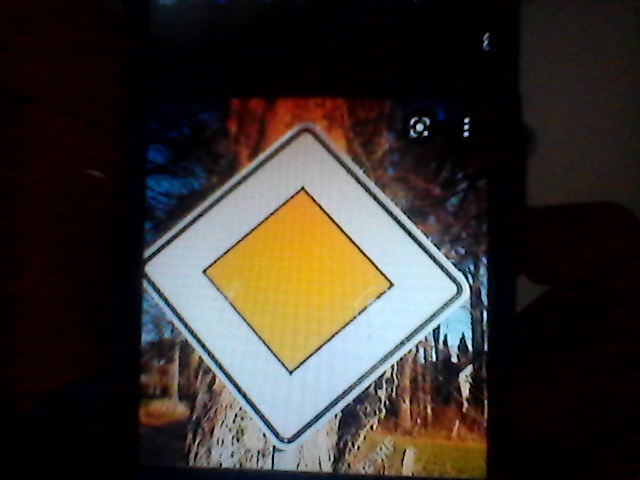

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
# IMAGEN 
image = cv2.imread(UbicacionPrueba)
image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = model.predict(input_data)
result = pred.argmax()
Valoracion = classes.get(result)

Text(0, 0.5, '480')

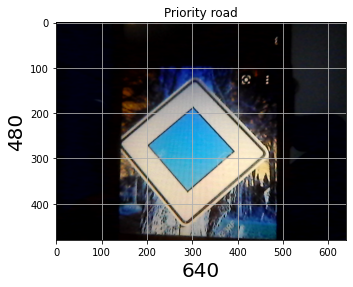

In [ ]:
plt.imshow(image)
plt.grid(b=None)
plt.title(Valoracion)
plt.xlabel(image.shape[1], fontsize = 20)#width of image
plt.ylabel(image.shape[0], fontsize = 20)#height of image

## CAPTURA DE VIDEO 

In [252]:
# Funcion para convertir de JavaScript object en una imagen OpenCV 
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# Fucion para convertir OpenCV  imagen en  base64 byte string para superponerlo en la transmision del video 
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# Funcion de Javascript que permite crear correctamente la transmision de video con la webcam
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

## TEST : 

In [253]:
from PIL import Image
# Empezar captura de video desde la webcam
video_stream()
# label del video
label_html = 'Capturando Video'
# Bbox contendra la descripcion de la identificacion realizada 
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    imgOrignal = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
#------------------------------------------------
    #PREDICCION DE IMAGEN USANDO EL MODELO 
    Porcentaje_Aceptable = 0.90


    cv2.putText(imgOrignal,str("TRAFFIC SIGN:"),(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(imgOrignal,"PROBABILITY:",(20,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
   
   #Convertir la imagen en RGB 
    image_fromarray = Image.fromarray(imgOrignal, 'RGB')
   #Redimensionar la imagen de 30 x 30 
    resize_image = image_fromarray.resize((30, 30))
    #Expandir las dimensiones de la imagen - Agregar un eje
    expand_input = np.expand_dims(resize_image,axis=0)
   #Convertir la entrada expandida en un arreglo de numpy 
    input_data = np.array(expand_input)
    # Normalizar el arreglo a una escala de 255 
    input_data = input_data/255

  #Realizar la predicción untilizando el modelo creado 
    pred = model.predict(input_data)
    # Devuelve los índices de los valores máximos a lo largo de un eje.
    result = pred.argmax()
    # Se busca en el diccionario la descripcion de señal de acuerdo a la prediccion realizada 
    Valoracion = classes.get(result)
    # Obtener la probabilidad de acierto del modelo 
    probabilityValue=np.amax(pred)

    
  #Conversion Imagen to array para Js
   # font
    font = cv2.FONT_HERSHEY_SIMPLEX
  # org
    org =  (90, 35 - 5)
    # fontScale
    fontScale = 0.7
  # Blue color in BGR
    color = (89, 239, 179)
    # Line thickness of 2 px
    thickness = 2

    if probabilityValue > Porcentaje_Aceptable :
        bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format(Valoracion, float(probabilityValue)),org,font,fontScale, color, thickness, cv2.LINE_AA)
    else:
        bbox_array = cv2.putText(bbox_array, "{} [{:.2f}]".format("Irreconocible", float(0.0)),org,font,fontScale, color, thickness, cv2.LINE_AA)
    
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>